In [4]:
import igrat
import numpy as np

In [5]:
def find_tropopause(height, temperature):    
    # Calculate lapse rate (dT/dz)
    dz = np.diff(height)
    dT = np.diff(temperature)
    lapse_rate = dT/dz
    
    # Find where lapse rate becomes less than 2 K/km (WMO definition) and height > 10000m
    tropopause_indices = np.where((lapse_rate[50:] > -2/1000))[0]
    tropopause_idx = tropopause_indices[0] if len(tropopause_indices) > 0 else None
    if tropopause_idx is None:
        return np.nan

    return height[50+tropopause_idx]

In [ ]:
station_list = ['GQM00091212', 'RQM00078526', 'USM00091285', 'USM00091165', 'HKM00045004',
                'JAM00047991', 'USM00072201', 'JAM00047945', 'USM00072250', 'JAM00047971',
                'USM00072210', 'USM00072261', 'USM00072240', 'CHM00058457', 'JAM00047827',
                'USM00072364', 'CHM00058238', 'USM00072265', 'ISM00040179', 'USM00072274',
                'USM00072235', 'USM00072293', 'USM00072208', 'CHM00057127', 'JAM00047678',
                'JAM00047778', 'JAM00047807', 'CHM00058150', 'CHM00058027', 'JAM00047681',
                'USM00072340', 'KSM00047158', 'USM00072363', 'CHM00053915', 'JAM00047646',
                'CHM00054857', 'USM00072317', 'CHM00053845', 'CHM00051828', 'JAM00047600',
                'CHM00053772', 'USM00072493', 'USM00072451', 'USM00072402', 'CHM00053614',
                'CHM00052681', 'USM00072403', 'CHM00051777', 'CHM00051709', 'JAM00047582',
                'CHM00054511', 'CHM00052418', 'SPM00008221', 'USM00072520', 'ITM00016320',
                'JAM00047580', 'USM00072572', 'USM00072562', 'USM00072558', 'USM00074494',
                'CHM00054218', 'USM00072597', 'USM00072518', 'CHM00054292', 'USM00072528',
                'JAM00047412', 'USM00072681', 'CHM00054135', 'CHM00051463', 'USM00074389',
                'CAM00071600', 'CHM00054102', 'USM00072662', 'USM00072645', 'FRM00007510',
                'USM00072694', 'JAM00047401', 'ITM00016080', 'CHM00050953', 'CAM00071722',
                'SZM00006610', 'USM00072712', 'HUM00012843', 'USM00072776', 'USM00072786',
                'CHM00051076', 'USM00072797', 'USM00072768', 'GMM00010868', 'AUM00011035',
                'USM00072747', 'CAM00071815', 'GMM00010739', 'LOM00011952', 'CHM00050557',
                'EZM00011520', 'CAM00071811', 'GMM00010548', 'CAM00071109', 'CAM00071836',
                'GMM00010410', 'EIM00003953', 'GMM00010393', 'PLM00012374', 'RSM00032540',
                'CAM00071816', 'CAM00071119', 'CAM00071867', 'GMM00010184', 'GMM00010035',
                'USM00070398', 'USM00070316', 'USM00070350', 'CAM00071906', 'CAM00071907',
                'USM00070326', 'CAM00071913', 'CAM00071934', 'UKM00003005', 'FIM00002963',
                'USM00070273', 'GLM00004270', 'NOM00001241', 'CAM00071909', 'ICM00004018',
                'USM00070200', 'RSM00022543', 'USM00070261', 'CAM00071043', 'CAM00071957',
                'CAM00071081', 'CAM00071925', 'JNM00001001', 'USM00070026', 'SVM00001028',
                'CAM00071924', 'CAM00071917', 'SPM00008001', 'UKM00003808', 'NOM00001415',
                'FIM00002836', 'GLM00004220', 'USM00072327', 'USM00072456', 'USM00072764',
                'USM00070308', 'USM00070361', 'USM00070219', 'USM00070231']

Extracting data for station GQM00091212...
Successfully downloaded and extracted data for GQM00091212
Found 65217 soundings with maximum 414 levels
Successfully created NetCDF file: /var/folders/68/mkzvfbj90k76cc7s0hc2xtvw0000gn/T/tmpztrdzskg.nc


/opt/anaconda3/envs/csc2529/lib/python3.11/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')



The following profiles were skipped during interpolation:
Profile 0 (Date: 19450413, Time: 12): Insufficient valid data points
Profile 1 (Date: 19450414, Time: 12): Insufficient valid data points
Profile 2 (Date: 19450414, Time: 23): Insufficient valid data points
Profile 3 (Date: 19450416, Time: 12): Insufficient valid data points
Profile 4 (Date: 19450417, Time: 11): Insufficient valid data points
Profile 5 (Date: 19450418, Time: 0): Insufficient valid data points
Profile 6 (Date: 19450418, Time: 12): Insufficient valid data points
Profile 7 (Date: 19450420, Time: 12): Insufficient valid data points
Profile 8 (Date: 19450421, Time: 0): Insufficient valid data points
Profile 9 (Date: 19450421, Time: 12): Insufficient valid data points
Profile 10 (Date: 19450421, Time: 23): Insufficient valid data points
Profile 11 (Date: 19450422, Time: 12): Insufficient valid data points
Profile 12 (Date: 19450423, Time: 11): Insufficient valid data points
Profile 13 (Date: 19450424, Time: 0): Insuf

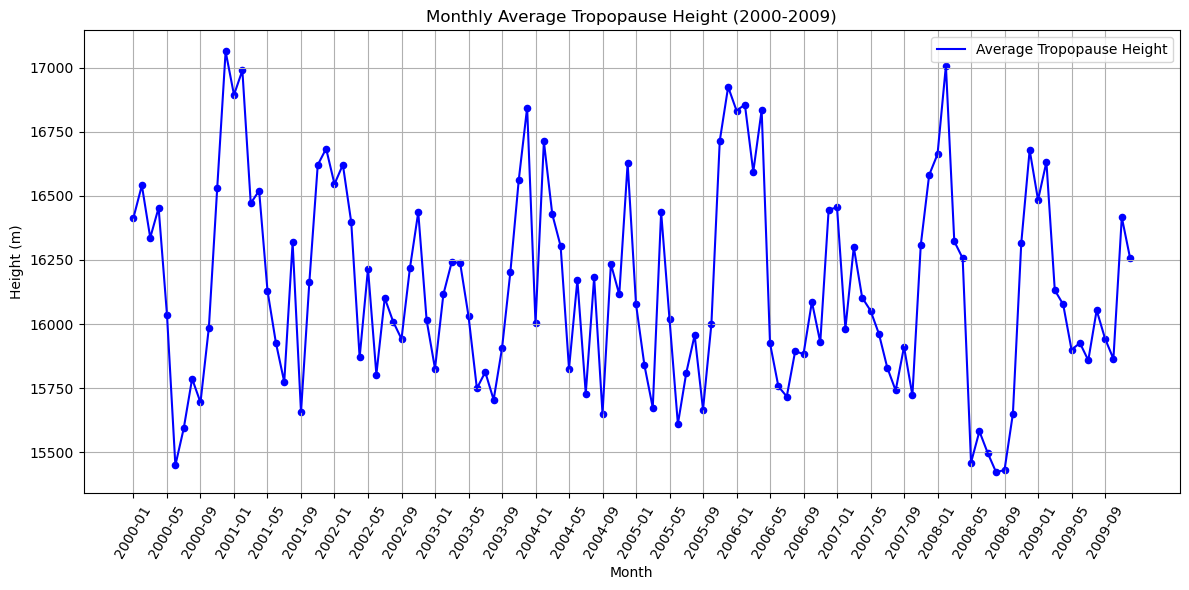

In [22]:
# Create a dictionary with monthly keys from 2000-01 to 2009-12
date_dict = {yyyymm: [] for yyyymm in range(200001, 200913) if 1 <= yyyymm % 100 <= 12}
station_list = ['GQM00091212']
monthly_averages_all_stations = []
for station_id in station_list:
    date_dict_station = date_dict.copy()
    data = igrat.read_station_data(station_id, file_type='netcdf', download=False)
    interpolated_data = igrat.interp_data(data, 'height', 'temperature', 0, 20000, 200, method='linear', fill_value=np.nan)
    
    for profile_idx in range(len(interpolated_data.num_profiles)):
        profile_date = int(str(interpolated_data.date.isel(num_profiles=profile_idx).values)[:6])
        if 200001 <= profile_date <= 200912:
            height = interpolated_data.gph.isel(num_profiles=profile_idx).values
            temp = interpolated_data.temperature.isel(num_profiles=profile_idx).values
            height, temp = igrat._filter_invalid_values(height, temp)
            tropopause_height = find_tropopause(height, temp)
            date_dict_station[profile_date].append(tropopause_height)

    monthly_average_station = [np.nanmean(date_dict_station[i]) for i in date_dict_station]
    monthly_averages_all_stations.append(monthly_average_station)

monthly_averages_all_stations = np.nanmean(monthly_averages_all_stations, axis=0)
print(monthly_averages_all_stations)

import matplotlib.pyplot as plt
# Convert dictionary to lists for plotting
months = list(range(1, len(monthly_averages_all_stations) + 1))
heights = monthly_averages_all_stations
print(heights)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(months, heights, 'b-', label='Average Tropopause Height')
plt.scatter(months, heights, color='blue', s=20)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Height (m)')
plt.title('Monthly Average Tropopause Height (2000-2009)')
plt.grid(True)

# Format x-axis labels as YYYY-MM
plt.xticks(months[::4], [f"{str(m)[:4]}-{str(m)[4:]}" for m in list(date_dict.keys())[::4]], rotation=60)

# Add legend
plt.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()




